In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Load the cement dataset
df = pd.read_csv('data/bank-full.csv', sep=';')
df.columns = ["age", "job", "marital", "education", "default", "balance", "housing", "loan", "contact", "day", "month", "duration", "campaign", "pdays", "previous", "poutcome", "y"]
df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
# description of the data
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [ ]:
df.shape

(45211, 17)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
# checking null and duplicate values
print(df.isnull().sum())
print(df.duplicated().sum())
# we don't need day so remove it
df.drop('day', axis=1, inplace=True)

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64
0


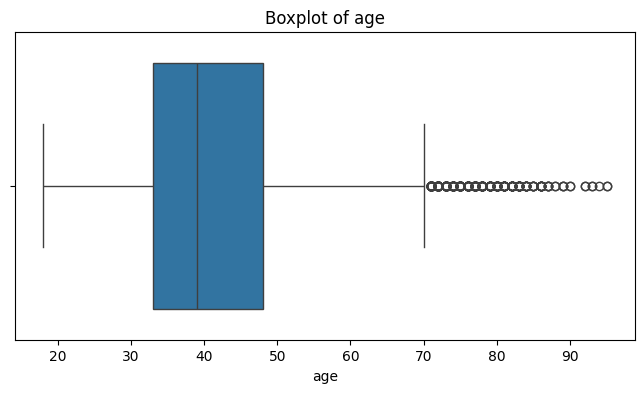

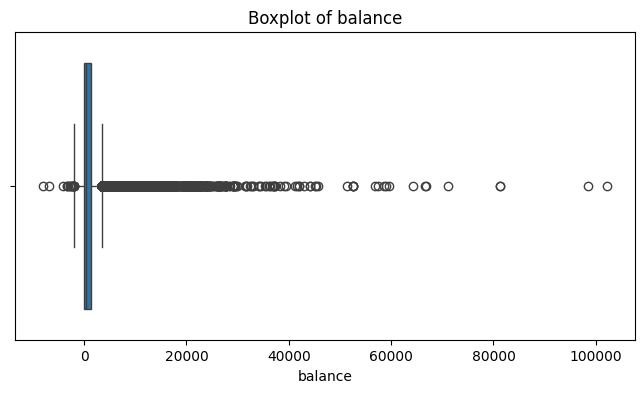

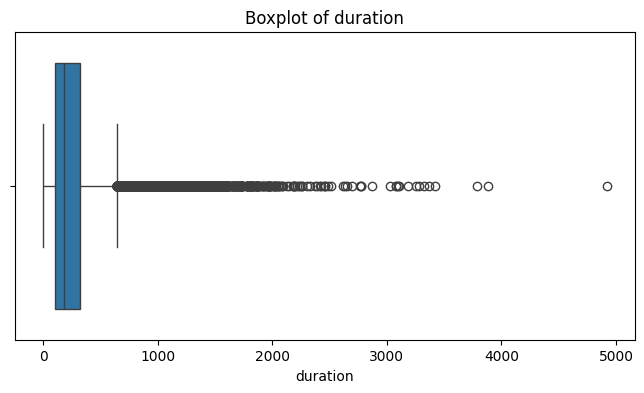

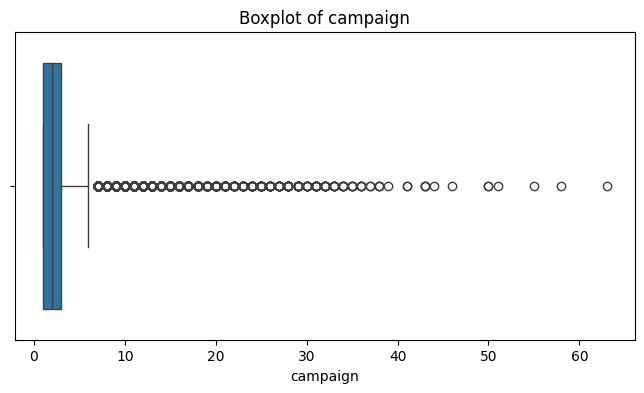

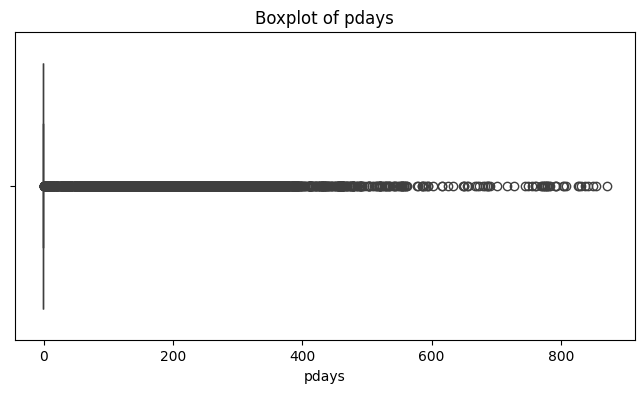

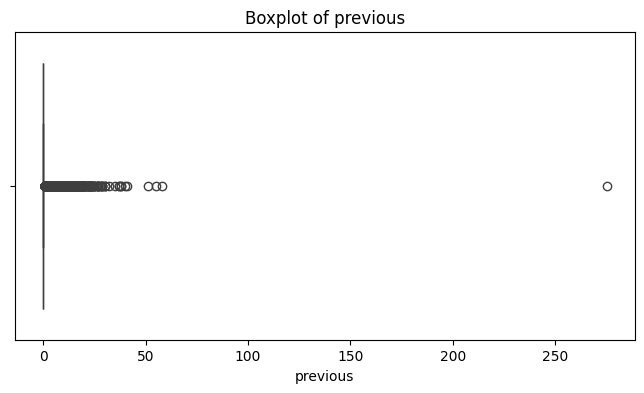

In [ ]:
# finding the outliers in numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


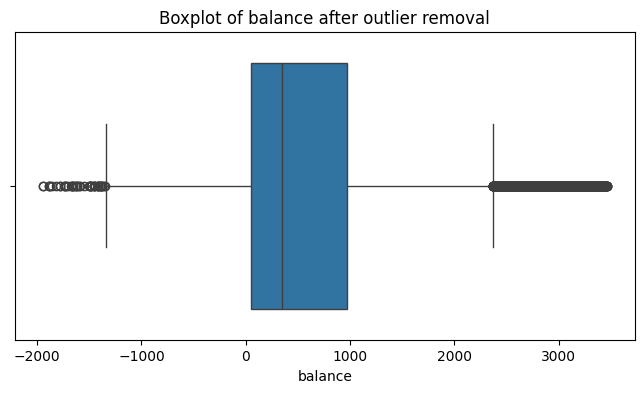

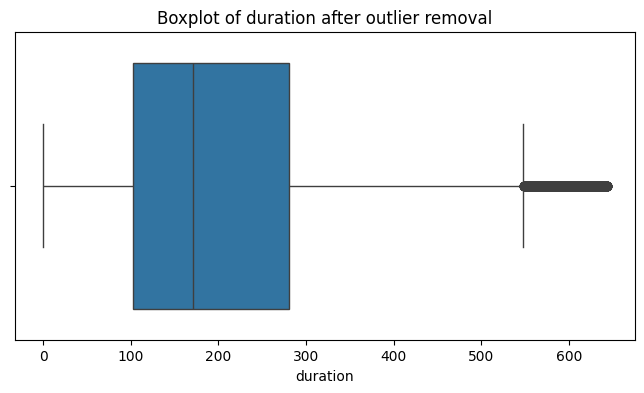

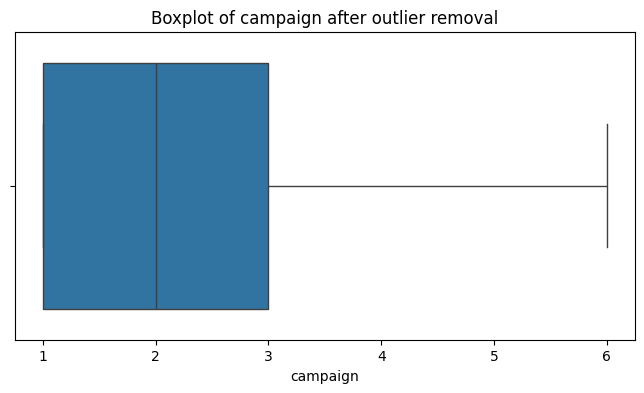

In [ ]:
# removing outliers of balance, duration and campaign columns
Q1 = df[['balance', 'duration', 'campaign']].quantile(0.25)
Q3 = df[['balance', 'duration', 'campaign']].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df[['balance', 'duration', 'campaign']] < (Q1 - 1.5 * IQR)) | (df[['balance', 'duration', 'campaign']] > (Q3 + 1.5 * IQR))).any(axis=1)]
# Verify outliers removal
for col in ['balance', 'duration', 'campaign']:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col} after outlier removal')
    plt.show()

In [ ]:
# now we will encode categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True).astype(float)
print(df.head())
# splitting the data into X and y
X = df.drop('y_yes', axis=1)
y = df['y_yes']
# splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# scaling the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


    age  balance  duration  campaign  pdays  previous  job_blue-collar  \
0  58.0   2143.0     261.0       1.0   -1.0       0.0              0.0   
1  44.0     29.0     151.0       1.0   -1.0       0.0              0.0   
2  33.0      2.0      76.0       1.0   -1.0       0.0              0.0   
3  47.0   1506.0      92.0       1.0   -1.0       0.0              1.0   
4  33.0      1.0     198.0       1.0   -1.0       0.0              0.0   

   job_entrepreneur  job_housemaid  job_management  ...  month_jun  month_mar  \
0               0.0            0.0             1.0  ...        0.0        0.0   
1               0.0            0.0             0.0  ...        0.0        0.0   
2               1.0            0.0             0.0  ...        0.0        0.0   
3               0.0            0.0             0.0  ...        0.0        0.0   
4               0.0            0.0             0.0  ...        0.0        0.0   

   month_may  month_nov  month_oct  month_sep  poutcome_other  \
0  

In [ ]:
# training and evaluating different classification models
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)


In [ ]:
decision_tree_model = DecisionTreeClassifier(random_state=42)   
decision_tree_model.fit(X_train, y_train)
y_pred_decision_tree = decision_tree_model.predict(X_test)


In [ ]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)


In [ ]:
svc_model = SVC(random_state=42)
svc_model.fit(X_train, y_train) 
y_pred_svc = svc_model.predict(X_test)


In [ ]:
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train, y_train)
y_pred_random_forest = random_forest_model.predict(X_test)

In [ ]:
# evaluating the models
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
models = {
    'Logistic Regression': y_pred_logistic,
    'Decision Tree': y_pred_decision_tree,
    'K-Nearest Neighbors': y_pred_knn,
    'Support Vector Classifier': y_pred_svc,
    'Random Forest': y_pred_random_forest
}
for model_name, y_pred in models.items():
    print(f'--- {model_name} ---')
    print('Accuracy:', accuracy_score(y_test, y_pred))
    print('Classification Report:\n', classification_report(y_test, y_pred))
    print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
    print('\n')

--- Logistic Regression ---
Accuracy: 0.9279703323349023
Classification Report:
               precision    recall  f1-score   support

         0.0       0.94      0.98      0.96      6426
         1.0       0.64      0.32      0.43       585

    accuracy                           0.93      7011
   macro avg       0.79      0.65      0.69      7011
weighted avg       0.92      0.93      0.92      7011

Confusion Matrix:
 [[6319  107]
 [ 398  187]]


--- Decision Tree ---
Accuracy: 0.897732135216089
Classification Report:
               precision    recall  f1-score   support

         0.0       0.95      0.94      0.94      6426
         1.0       0.40      0.43      0.41       585

    accuracy                           0.90      7011
   macro avg       0.67      0.69      0.68      7011
weighted avg       0.90      0.90      0.90      7011

Confusion Matrix:
 [[6041  385]
 [ 332  253]]


--- K-Nearest Neighbors ---
Accuracy: 0.919412352018257
Classification Report:
               p

In [ ]:
# random forest is performing better than other models